In [15]:
#allowoutputfromeveryline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
#import pandas and numpy
import pandas as pd
import numpy as np
#import vizualizaitons
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns


In [16]:
#Python Web Scrapping
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

In [17]:
num_list = [20, 21, 22, 23,24, 25, 26,53, 54,59,61]

In [18]:
summer_olympics = []
summer_olympics_all = pd.DataFrame()
for i in num_list:
    url = 'https://www.olympedia.org/editions/' + str(i) + '/medal'
    html = urlopen(url)
    bs = BeautifulSoup(html.read(), 'lxml')
    tables = bs.find_all('table',{"class":"table"})
    results1 = pd.read_html(str(tables))
    df = results1[0]
    df['Summer Olympics'] = i
   
    df.loc[df.iloc[:, 2].str.len() > 3, 'Sport'] = df.iloc[:, 2] #if Unnamed:2 contains a value with more than 3 characters, then this is the sport - set the value in a new Sport column
    df['Sport'] = df['Sport'].fillna(method='ffill') #fill in NA values using the previous non-NA value
    summer_olympics_all = pd.concat([summer_olympics_all,df], ignore_index=True) #concat with previous dataframe
    summer_olympics.append(df)

In [19]:

#ReName Country Gold Column
summer_olympics_all.rename(columns={'Unnamed: 2':'Country Gold'},inplace=True)
summer_olympics_all.rename(columns={'Unnamed: 4':'Country Silver'},inplace=True)
summer_olympics_all.rename(columns={'Unnamed: 6':'Country Bronze'},inplace=True)

#Concat Sport/Event and Sport 
summer_olympics_all["Event"] = summer_olympics_all["Sport"] + ': ' + summer_olympics_all["Sport/Event"]

summer_olympics_all=summer_olympics_all[summer_olympics_all["Sport/Event"]!=summer_olympics_all["Gold"]]
summer_olympics_all






,Sport/Event,Gold,Country Gold,Silver,Country Silver,Bronze,Country Bronze,Summer Olympics,Sport,Event
1,"Individual, Men",Tomi Poikolainen,FIN,Boris Isachenko,URS,Giancarlo Ferrari,ITA,20,Archery,"Archery: Individual, Men"
2,"Individual, Women",Ketevan Losaberidze,URS,Nataliya Butuzova,URS,Päivi Meriluoto,FIN,20,Archery,"Archery: Individual, Women"
4,"Individual All-Around, Men",Aleksandr Dityatin,URS,Nikolay Andrianov,URS,Stoyan Delchev,BUL,20,Artistic Gymnastics,"Artistic Gymnastics: Individual All-Around, Men"
5,"Team All-Around, Men",Soviet Union,URS,East Germany,GDR,Hungary,HUN,20,Artistic Gymnastics,"Artistic Gymnastics: Team All-Around, Men"
6,"Floor Exercise, Men",Roland Brückner,GDR,Nikolay Andrianov,URS,Aleksandr Dityatin,URS,20,Artistic Gymnastics,"Artistic Gymnastics: Floor Exercise, Men"
...,...,...,...,...,...,...,...,...,...,...
3435,"Featherweight, Freestyle, Women",Mayu Mukaida,JPN,Pang Qianyu,CHN,Vanesa KaladzinskayaBat Ochir Bolortuya,BLRMGL,61,Wrestling,"Wrestling: Featherweight, Freestyle, Women"
3436,"Lightweight, Freestyle, Women",Risako Kawai,JPN,Iryna Kurachkina,BLR,Helen MaroulisEvelina Nikolova,USABUL,61,Wrestling,"Wrestling: Lightweight, Freestyle, Women"
3437,"Middleweight, Freestyle, Women",Yukako Kawai,JPN,Aysuluu Tynybekova,KGZ,Iryna KoliadenkoTaybe Yusein,UKRBUL,61,Wrestling,"Wrestling: Middleweight, Freestyle, Women"
3438,"Light-Heavyweight, Freestyle, Women",Tamyra Mensah-Stock,USA,Blessing Oborududu,NGR,Alla CherkasovaMeerim Zhumanazarova,UKRKGZ,61,Wrestling,"Wrestling: Light-Heavyweight, Freestyle, Women"


In [20]:
#Make Each Olympic own database 
tokyo_olympics=summer_olympics_all[summer_olympics_all["Summer Olympics"]==61]
tokyo_olympics
rio_olympics=summer_olympics_all[summer_olympics_all["Summer Olympics"]==59]
rio_olympics
london_olympics=summer_olympics_all[summer_olympics_all["Summer Olympics"]==54]
london_olympics
beijing_olympics=summer_olympics_all[summer_olympics_all["Summer Olympics"]==53]
beijing_olympics
athens_olympics=summer_olympics_all[summer_olympics_all["Summer Olympics"]==26]
athens_olympics
sydney_olympics=summer_olympics_all[summer_olympics_all["Summer Olympics"]==25]
sydney_olympics
atlanta_olympics=summer_olympics_all[summer_olympics_all["Summer Olympics"]==24]
atlanta_olympics
barcelona_olympics=summer_olympics_all[summer_olympics_all["Summer Olympics"]==23]
barcelona_olympics
seoul_olympics=summer_olympics_all[summer_olympics_all["Summer Olympics"]==22]
seoul_olympics
la1984_olympics=summer_olympics_all[summer_olympics_all["Summer Olympics"]==21]
la1984_olympics
moscow_olympics=summer_olympics_all[summer_olympics_all["Summer Olympics"]==20]
moscow_olympics



,Sport/Event,Gold,Country Gold,Silver,Country Silver,Bronze,Country Bronze,Summer Olympics,Sport,Event
3053,"3x3 Basketball, Men",Latvia,LAT,ROC,ROC,Serbia,SRB,61,3x3 Basketball,"3x3 Basketball: 3x3 Basketball, Men"
3054,"3x3 Basketball, Women",United States,USA,ROC,ROC,People's Republic of China,CHN,61,3x3 Basketball,"3x3 Basketball: 3x3 Basketball, Women"
3056,"Individual, Men",Mete Gazoz,TUR,Mauro Nespoli,ITA,Takaharu Furukawa,JPN,61,Archery,"Archery: Individual, Men"
3057,"Team, Men",Republic of Korea,KOR,Chinese Taipei,TPE,Japan,JPN,61,Archery,"Archery: Team, Men"
3058,"Individual, Women",An San,KOR,Yelena Osipova,ROC,Lucilla Boari,ITA,61,Archery,"Archery: Individual, Women"
...,...,...,...,...,...,...,...,...,...,...
3435,"Featherweight, Freestyle, Women",Mayu Mukaida,JPN,Pang Qianyu,CHN,Vanesa KaladzinskayaBat Ochir Bolortuya,BLRMGL,61,Wrestling,"Wrestling: Featherweight, Freestyle, Women"
3436,"Lightweight, Freestyle, Women",Risako Kawai,JPN,Iryna Kurachkina,BLR,Helen MaroulisEvelina Nikolova,USABUL,61,Wrestling,"Wrestling: Lightweight, Freestyle, Women"
3437,"Middleweight, Freestyle, Women",Yukako Kawai,JPN,Aysuluu Tynybekova,KGZ,Iryna KoliadenkoTaybe Yusein,UKRBUL,61,Wrestling,"Wrestling: Middleweight, Freestyle, Women"
3438,"Light-Heavyweight, Freestyle, Women",Tamyra Mensah-Stock,USA,Blessing Oborududu,NGR,Alla CherkasovaMeerim Zhumanazarova,UKRKGZ,61,Wrestling,"Wrestling: Light-Heavyweight, Freestyle, Women"


,Sport/Event,Gold,Country Gold,Silver,Country Silver,Bronze,Country Bronze,Summer Olympics,Sport,Event
2706,"Individual, Men",Gu Bon-Chan,KOR,Jean-Charles Valladont,FRA,Brady Ellison,USA,59,Archery,"Archery: Individual, Men"
2707,"Team, Men",Republic of Korea,KOR,United States,USA,Australia,AUS,59,Archery,"Archery: Team, Men"
2708,"Individual, Women",Jang Hye-Jin,KOR,Lisa Unruh,GER,Gi Bo-Bae,KOR,59,Archery,"Archery: Individual, Women"
2709,"Team, Women",Republic of Korea,KOR,Russian Federation,RUS,Chinese Taipei,TPE,59,Archery,"Archery: Team, Women"
2711,"Individual All-Around, Men",Kohei Uchimura,JPN,Oleh Verniaiev,UKR,Max Whitlock,GBR,59,Artistic Gymnastics,"Artistic Gymnastics: Individual All-Around, Men"
...,...,...,...,...,...,...,...,...,...,...
3047,"Featherweight, Freestyle, Women",Helen Maroulis,USA,Saori Yoshida,JPN,Nataliya SinişinSofia Mattsson,AZESWE,59,Wrestling,"Wrestling: Featherweight, Freestyle, Women"
3048,"Lightweight, Freestyle, Women",Kaori Icho,JPN,Valeriya Koblova,RUS,Marwa AmriSakshi Malik,TUNIND,59,Wrestling,"Wrestling: Lightweight, Freestyle, Women"
3049,"Middleweight, Freestyle, Women",Risako Kawai,JPN,Maryia Mamashuk,BLR,Yekaterina LarionovaMonika Michalik,KAZPOL,59,Wrestling,"Wrestling: Middleweight, Freestyle, Women"
3050,"Light-Heavyweight, Freestyle, Women",Sara Dosho,JPN,Nataliya Vorobyova,RUS,Elmira SyzdykovaJenny Fransson,KAZSWE,59,Wrestling,"Wrestling: Light-Heavyweight, Freestyle, Women"


,Sport/Event,Gold,Country Gold,Silver,Country Silver,Bronze,Country Bronze,Summer Olympics,Sport,Event
2365,"Individual, Men",Oh Jin-Hyeok,KOR,Takaharu Furukawa,JPN,Dai Xiaoxiang,CHN,54,Archery,"Archery: Individual, Men"
2366,"Team, Men",Italy,ITA,United States,USA,Republic of Korea,KOR,54,Archery,"Archery: Team, Men"
2367,"Individual, Women",Gi Bo-Bae,KOR,Aída Román,MEX,Mariana Avitia,MEX,54,Archery,"Archery: Individual, Women"
2368,"Team, Women",Republic of Korea,KOR,People's Republic of China,CHN,Japan,JPN,54,Archery,"Archery: Team, Women"
2370,"Individual All-Around, Men",Kohei Uchimura,JPN,Marcel Nguyen,GER,Danell Leyva,USA,54,Artistic Gymnastics,"Artistic Gymnastics: Individual All-Around, Men"
...,...,...,...,...,...,...,...,...,...,...
2700,"Super-Heavyweight, Freestyle, Men",Komeil GhasemiBilyal Makhov,IRIRUS,—,—,Tervel DlagnevDaulet Shabanbay,USAKAZ,54,IRIRUS,"IRIRUS: Super-Heavyweight, Freestyle, Men"
2701,"Flyweight, Freestyle, Women",Hitomi Obara,JPN,Mariya Stadnik,AZE,Carol HuynhClarissa Chun,CANUSA,54,IRIRUS,"IRIRUS: Flyweight, Freestyle, Women"
2702,"Lightweight, Freestyle, Women",Saori Yoshida,JPN,Tonya Verbeek,CAN,Jackeline RenteríaYuliya Ratkeviç,COLAZE,54,IRIRUS,"IRIRUS: Lightweight, Freestyle, Women"
2703,"Middleweight, Freestyle, Women",Kaori Icho,JPN,Jing Ruixue,CHN,Soronzonboldyn BattsetsegLyubov Volosova,MGLRUS,54,IRIRUS,"IRIRUS: Middleweight, Freestyle, Women"


,Sport/Event,Gold,Country Gold,Silver,Country Silver,Bronze,Country Bronze,Summer Olympics,Sport,Event
2022,"Individual, Men",Viktor Ruban,UKR,Park Gyeong-Mo,KOR,Bair Badyonov,RUS,53,Archery,"Archery: Individual, Men"
2023,"Team, Men",Republic of Korea,KOR,Italy,ITA,People's Republic of China,CHN,53,Archery,"Archery: Team, Men"
2024,"Individual, Women",Zhang Juanjuan,CHN,Park Seong-Hyeon,KOR,Yun Ok-Hui,KOR,53,Archery,"Archery: Individual, Women"
2025,"Team, Women",Republic of Korea,KOR,People's Republic of China,CHN,France,FRA,53,Archery,"Archery: Team, Women"
2027,"Individual All-Around, Men",Yang Wei,CHN,Kohei Uchimura,JPN,Benoît Caranobe,FRA,53,Artistic Gymnastics,"Artistic Gymnastics: Individual All-Around, Men"
...,...,...,...,...,...,...,...,...,...,...
2359,"Super-Heavyweight, Freestyle, Men",Bakhtiyar Akhmedov,RUS,David Musuľbes,SVK,Marid MutalimovDisney Rodríguez,KAZCUB,53,Wrestling,"Wrestling: Super-Heavyweight, Freestyle, Men"
2360,"Flyweight, Freestyle, Women",Carol Huynh,CAN,Chiharu Icho,JPN,Mariya StadnikIryna Merleni-Mykulchyn,AZEUKR,53,Wrestling,"Wrestling: Flyweight, Freestyle, Women"
2361,"Lightweight, Freestyle, Women",Saori Yoshida,JPN,Xu Li,CHN,Tonya VerbeekJackeline Rentería,CANCOL,53,Wrestling,"Wrestling: Lightweight, Freestyle, Women"
2362,"Middleweight, Freestyle, Women",Kaori Icho,JPN,Alyona Kartashova,RUS,Yelena ShalyginaRandi Miller,KAZUSA,53,Wrestling,"Wrestling: Middleweight, Freestyle, Women"


,Sport/Event,Gold,Country Gold,Silver,Country Silver,Bronze,Country Bronze,Summer Olympics,Sport,Event
1682,"Individual, Men",Marco Galiazzo,ITA,Hiroshi Yamamoto,JPN,Tim Cuddihy,AUS,26,Archery,"Archery: Individual, Men"
1683,"Team, Men",Republic of Korea,KOR,Chinese Taipei,TPE,Ukraine,UKR,26,Archery,"Archery: Team, Men"
1684,"Individual, Women",Park Seong-Hyeon,KOR,Lee Seong-Jin,KOR,Alison Williamson,GBR,26,Archery,"Archery: Individual, Women"
1685,"Team, Women",Republic of Korea,KOR,People's Republic of China,CHN,Chinese Taipei,TPE,26,Archery,"Archery: Team, Women"
1687,"Individual All-Around, Men",Paul Hamm,USA,Kim Dae-Eun,KOR,Yang Tae-Yeong,KOR,26,Artistic Gymnastics,"Artistic Gymnastics: Individual All-Around, Men"
...,...,...,...,...,...,...,...,...,...,...
2016,"Super-Heavyweight, Freestyle, Men",Artur Taymazov,UZB,Ali Reza Rezaei,IRI,Aydın Polatçı,TUR,26,Wrestling,"Wrestling: Super-Heavyweight, Freestyle, Men"
2017,"Flyweight, Freestyle, Women",Iryna Merleni,UKR,Chiharu Icho,JPN,Patricia Miranda,USA,26,Wrestling,"Wrestling: Flyweight, Freestyle, Women"
2018,"Lightweight, Freestyle, Women",Saori Yoshida,JPN,Tonya Verbeek,CAN,Anna Gomis,FRA,26,Wrestling,"Wrestling: Lightweight, Freestyle, Women"
2019,"Middleweight, Freestyle, Women",Kaori Icho,JPN,Sara McMann,USA,Lise Legrand,FRA,26,Wrestling,"Wrestling: Middleweight, Freestyle, Women"


,Sport/Event,Gold,Country Gold,Silver,Country Silver,Bronze,Country Bronze,Summer Olympics,Sport,Event
1343,"Individual, Men",Simon Fairweather,AUS,Vic Wunderle,USA,Wietse van Alten,NED,25,Archery,"Archery: Individual, Men"
1344,"Team, Men",Republic of Korea,KOR,Italy,ITA,United States,USA,25,Archery,"Archery: Team, Men"
1345,"Individual, Women",Yun Mi-Jin,KOR,Kim Nam-Sun,KOR,Kim Su-Nyeong,KOR,25,Archery,"Archery: Individual, Women"
1346,"Team, Women",Republic of Korea,KOR,Ukraine,UKR,Germany,GER,25,Archery,"Archery: Team, Women"
1348,"Individual All-Around, Men",Aleksey Nemov,RUS,Yang Wei,CHN,Oleksandr Beresh,UKR,25,Artistic Gymnastics,"Artistic Gymnastics: Individual All-Around, Men"
...,...,...,...,...,...,...,...,...,...,...
1676,"Welterweight, Freestyle, Men",Daniel Igali,CAN,Arsen Gitinov,RUS,Lincoln McIlravy,USA,25,Wrestling,"Wrestling: Welterweight, Freestyle, Men"
1677,"Middleweight, Freestyle, Men",Brandon Slay,USA,Mun Ui-Je,KOR,Adem Bereket,TUR,25,Wrestling,"Wrestling: Middleweight, Freestyle, Men"
1678,"Light-Heavyweight, Freestyle, Men",Adam Saytiyev,RUS,Yoel Romero,CUB,Mogamed Ibragimov,MKD,25,Wrestling,"Wrestling: Light-Heavyweight, Freestyle, Men"
1679,"Heavyweight, Freestyle, Men",Sagid Murtazaliyev,RUS,Islam Bayramukov,KAZ,Eldar K'urt'anidze,GEO,25,Wrestling,"Wrestling: Heavyweight, Freestyle, Men"


,Sport/Event,Gold,Country Gold,Silver,Country Silver,Bronze,Country Bronze,Summer Olympics,Sport,Event
1036,"Individual, Men",Justin Huish,USA,Magnus Petersson,SWE,Oh Gyo-Mun,KOR,24,Archery,"Archery: Individual, Men"
1037,"Team, Men",United States,USA,Republic of Korea,KOR,Italy,ITA,24,Archery,"Archery: Team, Men"
1038,"Individual, Women",Kim Gyeong-Uk,KOR,He Ying,CHN,Olena Sadovnycha,UKR,24,Archery,"Archery: Individual, Women"
1039,"Team, Women",Republic of Korea,KOR,Germany,GER,Poland,POL,24,Archery,"Archery: Team, Women"
1041,"Individual All-Around, Men",Li Xiaoshuang,CHN,Aleksey Nemov,RUS,Vitali Shcherba,BLR,24,Artistic Gymnastics,"Artistic Gymnastics: Individual All-Around, Men"
...,...,...,...,...,...,...,...,...,...,...
1337,"Welterweight, Freestyle, Men",Buvaysar Saytiyev,RUS,Park Jang-Sun,KOR,Takuya Ota,JPN,24,Wrestling,"Wrestling: Welterweight, Freestyle, Men"
1338,"Middleweight, Freestyle, Men",Khadzhimurat Magomedov,RUS,Yang Hyeong-Mo,KOR,Amir Reza Khadem Azgadhi,IRI,24,Wrestling,"Wrestling: Middleweight, Freestyle, Men"
1339,"Light-Heavyweight, Freestyle, Men",Rasoul Khadem Azgadhi,IRI,Makharbek Khadartsev,RUS,Eldar K'urt'anidze,GEO,24,Wrestling,"Wrestling: Light-Heavyweight, Freestyle, Men"
1340,"Heavyweight, Freestyle, Men",Kurt Angle,USA,Abbas Jadidi,IRI,Arawat Sabejew,GER,24,Wrestling,"Wrestling: Heavyweight, Freestyle, Men"


,Sport/Event,Gold,Country Gold,Silver,Country Silver,Bronze,Country Bronze,Summer Olympics,Sport,Event
746,"Individual, Men",Sébastien Flûte,FRA,Jeong Jae-Heon,KOR,Simon Terry,GBR,23,Archery,"Archery: Individual, Men"
747,"Team, Men",Spain,ESP,Finland,FIN,Great Britain,GBR,23,Archery,"Archery: Team, Men"
748,"Individual, Women",Jo Yun-Jeong,KOR,Kim Su-Nyeong,KOR,Natalia Valeeva,EUN,23,Archery,"Archery: Individual, Women"
749,"Team, Women",Republic of Korea,KOR,People's Republic of China,CHN,Unified Team,EUN,23,Archery,"Archery: Team, Women"
751,"Individual All-Around, Men",Vitali Shcherba,EUN,Hryhoriy Misiutin,EUN,Valery Belenky,EUN,23,Artistic Gymnastics,"Artistic Gymnastics: Individual All-Around, Men"
...,...,...,...,...,...,...,...,...,...,...
1030,"Welterweight, Freestyle, Men",Park Jang-Sun,KOR,Kenny Monday,USA,Amir Reza Khadem Azgadhi,IRI,23,Wrestling,"Wrestling: Welterweight, Freestyle, Men"
1031,"Middleweight, Freestyle, Men",Kevin Jackson,USA,Elmadi Zhabrailov,EUN,Rasoul Khadem Azgadhi,IRI,23,Wrestling,"Wrestling: Middleweight, Freestyle, Men"
1032,"Light-Heavyweight, Freestyle, Men",Makharbek Khadartsev,EUN,Kenan Şimşek,TUR,Chris Campbell,USA,23,Wrestling,"Wrestling: Light-Heavyweight, Freestyle, Men"
1033,"Heavyweight, Freestyle, Men",Leri Khabelovi,EUN,Heiko Balz,GER,Ali Kayalı,TUR,23,Wrestling,"Wrestling: Heavyweight, Freestyle, Men"


,Sport/Event,Gold,Country Gold,Silver,Country Silver,Bronze,Country Bronze,Summer Olympics,Sport,Event
479,"Individual, Men",Jay Barrs,USA,Park Seong-Su,KOR,Vladimir Yesheyev,URS,22,Archery,"Archery: Individual, Men"
480,"Team, Men",Republic of Korea,KOR,United States,USA,Great Britain,GBR,22,Archery,"Archery: Team, Men"
481,"Individual, Women",Kim Su-Nyeong,KOR,Wang Hui-Gyeong,KOR,Yun Yeong-Suk,KOR,22,Archery,"Archery: Individual, Women"
482,"Team, Women",Republic of Korea,KOR,Indonesia,INA,United States,USA,22,Archery,"Archery: Team, Women"
484,"Individual All-Around, Men",Vladimir Artyomov,URS,Valery Lyukin,URS,Dmitry Bilozerchev,URS,22,Artistic Gymnastics,"Artistic Gymnastics: Individual All-Around, Men"
...,...,...,...,...,...,...,...,...,...,...
740,"Welterweight, Freestyle, Men",Kenny Monday,USA,Adlan Varayev,URS,Rahmat Sofiadi,BUL,22,Wrestling,"Wrestling: Welterweight, Freestyle, Men"
741,"Middleweight, Freestyle, Men",Han Myeong-U,KOR,Necmi Gençalp,TUR,Jozef Lohyňa,TCH,22,Wrestling,"Wrestling: Middleweight, Freestyle, Men"
742,"Light-Heavyweight, Freestyle, Men",Makharbek Khadartsev,URS,Akira Ota,JPN,Kim Tae-U,KOR,22,Wrestling,"Wrestling: Light-Heavyweight, Freestyle, Men"
743,"Heavyweight, Freestyle, Men",Vasile Pușcașu,ROU,Leri Khabelovi,URS,Bill Scherr,USA,22,Wrestling,"Wrestling: Heavyweight, Freestyle, Men"


,Sport/Event,Gold,Country Gold,Silver,Country Silver,Bronze,Country Bronze,Summer Olympics,Sport,Event
230,"Individual, Men",Darrell Pace,USA,Rick McKinney,USA,Hiroshi Yamamoto,JPN,21,Archery,"Archery: Individual, Men"
231,"Individual, Women",Seo Hyang-Sun,KOR,Li Lingjuan,CHN,Kim Jin-Ho,KOR,21,Archery,"Archery: Individual, Women"
233,"Individual All-Around, Men",Koji Gushiken,JPN,Peter Vidmar,USA,Li Ning,CHN,21,Artistic Gymnastics,"Artistic Gymnastics: Individual All-Around, Men"
234,"Team All-Around, Men",United States,USA,People's Republic of China,CHN,Japan,JPN,21,Artistic Gymnastics,"Artistic Gymnastics: Team All-Around, Men"
235,"Floor Exercise, Men",Li Ning,CHN,Lou Yun,CHN,Koji SotomuraPhilippe Vatuone,JPNFRA,21,Artistic Gymnastics,"Artistic Gymnastics: Floor Exercise, Men"
...,...,...,...,...,...,...,...,...,...,...
473,"Welterweight, Freestyle, Men",Dave Schultz,USA,Martin Knosp,FRG,Šaban Sejdi,YUG,21,Wrestling,"Wrestling: Welterweight, Freestyle, Men"
474,"Middleweight, Freestyle, Men",Mark Schultz,USA,Hideyuki Nagashima,JPN,Chris Rinke,CAN,21,Wrestling,"Wrestling: Middleweight, Freestyle, Men"
475,"Light-Heavyweight, Freestyle, Men",Ed Banach,USA,Akira Ota,JPN,Noel Loban,GBR,21,Wrestling,"Wrestling: Light-Heavyweight, Freestyle, Men"
476,"Heavyweight, Freestyle, Men",Lou Banach,USA,Joseph Atiyeh,SYR,Vasile Pușcașu,ROU,21,Wrestling,"Wrestling: Heavyweight, Freestyle, Men"


,Sport/Event,Gold,Country Gold,Silver,Country Silver,Bronze,Country Bronze,Summer Olympics,Sport,Event
1,"Individual, Men",Tomi Poikolainen,FIN,Boris Isachenko,URS,Giancarlo Ferrari,ITA,20,Archery,"Archery: Individual, Men"
2,"Individual, Women",Ketevan Losaberidze,URS,Nataliya Butuzova,URS,Päivi Meriluoto,FIN,20,Archery,"Archery: Individual, Women"
4,"Individual All-Around, Men",Aleksandr Dityatin,URS,Nikolay Andrianov,URS,Stoyan Delchev,BUL,20,Artistic Gymnastics,"Artistic Gymnastics: Individual All-Around, Men"
5,"Team All-Around, Men",Soviet Union,URS,East Germany,GDR,Hungary,HUN,20,Artistic Gymnastics,"Artistic Gymnastics: Team All-Around, Men"
6,"Floor Exercise, Men",Roland Brückner,GDR,Nikolay Andrianov,URS,Aleksandr Dityatin,URS,20,Artistic Gymnastics,"Artistic Gymnastics: Floor Exercise, Men"
...,...,...,...,...,...,...,...,...,...,...
224,"Welterweight, Freestyle, Men",Valentin Raychev,BUL,Jamtsyn Davaajav,MGL,Dan Karabin,TCH,20,Wrestling,"Wrestling: Welterweight, Freestyle, Men"
225,"Middleweight, Freestyle, Men",Ismail Abilov,BUL,Magomedkhan Aratsilov,URS,István Kovács,HUN,20,Wrestling,"Wrestling: Middleweight, Freestyle, Men"
226,"Light-Heavyweight, Freestyle, Men",Sanasar Oganisyan,URS,Uwe Neupert,GDR,Aleksander Cichoń,POL,20,Wrestling,"Wrestling: Light-Heavyweight, Freestyle, Men"
227,"Heavyweight, Freestyle, Men",Ilya Mate,URS,Slavcho Chervenkov,BUL,Július Strnisko,TCH,20,Wrestling,"Wrestling: Heavyweight, Freestyle, Men"


In [23]:
#convert event column to list
tokyo_olympics_events=tokyo_olympics["Event"].values.tolist()
rio_olympics_events=rio_olympics["Event"].values.tolist()
london_olympics_events=london_olympics ["Event"].values.tolist()
beijing_olympics_events=beijing_olympics["Event"].values.tolist()
athens_olympics_events=athens_olympics["Event"].values.tolist()
sydney_olympics_events=sydney_olympics["Event"].values.tolist()
atlanta_olympics_events=atlanta_olympics["Event"].values.tolist()
barcelona_olympics_events=barcelona_olympics['Event'].values.tolist()
seoul_olympics_events=seoul_olympics['Event'].values.tolist()
la1984_olympics_events=la1984_olympics['Event'].values.tolist()
moscow_olympics_events=moscow_olympics['Event'].values.tolist()


event_list = [rio_olympics["Event"], tokyo_olympics["Event"]]
                                                               
tokyo_olympics_events
rio_olympics_events
la1984_olympics



['3x3 Basketball: 3x3 Basketball, Men',
 '3x3 Basketball: 3x3 Basketball, Women',
 'Archery: Individual, Men',
 'Archery: Team, Men',
 'Archery: Individual, Women',
 'Archery: Team, Women',
 'Archery: Team, Mixed',
 'Artistic Gymnastics: Individual All-Around, Men',
 'Artistic Gymnastics: Team All-Around, Men',
 'Artistic Gymnastics: Floor Exercise, Men',
 'Artistic Gymnastics: Horse Vault, Men',
 'Artistic Gymnastics: Parallel Bars, Men',
 'Artistic Gymnastics: Horizontal Bar, Men',
 'Artistic Gymnastics: Rings, Men',
 'Artistic Gymnastics: Pommelled Horse, Men',
 'Artistic Gymnastics: Individual All-Around, Women',
 'Artistic Gymnastics: Team All-Around, Women',
 'Artistic Gymnastics: Floor Exercise, Women',
 'Artistic Gymnastics: Horse Vault, Women',
 'Artistic Gymnastics: Uneven Bars, Women',
 'Artistic Gymnastics: Balance Beam, Women',
 'Artistic Swimming: Duet, Women',
 'Artistic Swimming: Team, Women',
 'Athletics: 100 metres, Men',
 'Athletics: 200 metres, Men',
 'Athletics: 40

['Archery: Individual, Men',
 'Archery: Team, Men',
 'Archery: Individual, Women',
 'Archery: Team, Women',
 'Artistic Gymnastics: Individual All-Around, Men',
 'Artistic Gymnastics: Team All-Around, Men',
 'Artistic Gymnastics: Floor Exercise, Men',
 'Artistic Gymnastics: Horse Vault, Men',
 'Artistic Gymnastics: Parallel Bars, Men',
 'Artistic Gymnastics: Horizontal Bar, Men',
 'Artistic Gymnastics: Rings, Men',
 'Artistic Gymnastics: Pommelled Horse, Men',
 'Artistic Gymnastics: Individual All-Around, Women',
 'Artistic Gymnastics: Team All-Around, Women',
 'Artistic Gymnastics: Floor Exercise, Women',
 'Artistic Gymnastics: Horse Vault, Women',
 'Artistic Gymnastics: Uneven Bars, Women',
 'Artistic Gymnastics: Balance Beam, Women',
 'Artistic Swimming: Duet, Women',
 'Artistic Swimming: Team, Women',
 'Athletics: 100 metres, Men',
 'Athletics: 200 metres, Men',
 'Athletics: 400 metres, Men',
 'Athletics: 800 metres, Men',
 'Athletics: 1,500 metres, Men',
 'Athletics: 5,000 metres, 

,Sport/Event,Gold,Country Gold,Silver,Country Silver,Bronze,Country Bronze,Summer Olympics,Sport,Event,New Event
230,"Individual, Men",Darrell Pace,USA,Rick McKinney,USA,Hiroshi Yamamoto,JPN,21,Archery,"Archery: Individual, Men",False
231,"Individual, Women",Seo Hyang-Sun,KOR,Li Lingjuan,CHN,Kim Jin-Ho,KOR,21,Archery,"Archery: Individual, Women",False
233,"Individual All-Around, Men",Koji Gushiken,JPN,Peter Vidmar,USA,Li Ning,CHN,21,Artistic Gymnastics,"Artistic Gymnastics: Individual All-Around, Men",False
234,"Team All-Around, Men",United States,USA,People's Republic of China,CHN,Japan,JPN,21,Artistic Gymnastics,"Artistic Gymnastics: Team All-Around, Men",False
235,"Floor Exercise, Men",Li Ning,CHN,Lou Yun,CHN,Koji SotomuraPhilippe Vatuone,JPNFRA,21,Artistic Gymnastics,"Artistic Gymnastics: Floor Exercise, Men",False
...,...,...,...,...,...,...,...,...,...,...,...
473,"Welterweight, Freestyle, Men",Dave Schultz,USA,Martin Knosp,FRG,Šaban Sejdi,YUG,21,Wrestling,"Wrestling: Welterweight, Freestyle, Men",False
474,"Middleweight, Freestyle, Men",Mark Schultz,USA,Hideyuki Nagashima,JPN,Chris Rinke,CAN,21,Wrestling,"Wrestling: Middleweight, Freestyle, Men",False
475,"Light-Heavyweight, Freestyle, Men",Ed Banach,USA,Akira Ota,JPN,Noel Loban,GBR,21,Wrestling,"Wrestling: Light-Heavyweight, Freestyle, Men",False
476,"Heavyweight, Freestyle, Men",Lou Banach,USA,Joseph Atiyeh,SYR,Vasile Pușcașu,ROU,21,Wrestling,"Wrestling: Heavyweight, Freestyle, Men",False


In [21]:
#Add New Event Columnn
tokyo_olympics['New Event']='False'
tokyo_olympics
rio_olympics['New Event']='False'
rio_olympics
london_olympics['New Event']='False'
london_olympics
beijing_olympics['New Event']='False'
beijing_olympics
athens_olympics['New Event']='False'
athens_olympics
sydney_olympics['New Event']='False'
sydney_olympics
atlanta_olympics['New Event']="False"
atlanta_olympics
barcelona_olympics['New Event']='False'
barcelona_olympics
seoul_olympics['New Event']='False'
seoul_olympics
la1984_olympics['New Event']='False'
la1984_olympics
moscow_olympics['New Event']='False'
moscow_olympics

/var/folders/0v/_mv673l17y76b2ldbdg4c0sm0000gn/T/ipykernel_974/3396248010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tokyo_olympics['New Event']='False'


,Sport/Event,Gold,Country Gold,Silver,Country Silver,Bronze,Country Bronze,Summer Olympics,Sport,Event,New Event
3053,"3x3 Basketball, Men",Latvia,LAT,ROC,ROC,Serbia,SRB,61,3x3 Basketball,"3x3 Basketball: 3x3 Basketball, Men",False
3054,"3x3 Basketball, Women",United States,USA,ROC,ROC,People's Republic of China,CHN,61,3x3 Basketball,"3x3 Basketball: 3x3 Basketball, Women",False
3056,"Individual, Men",Mete Gazoz,TUR,Mauro Nespoli,ITA,Takaharu Furukawa,JPN,61,Archery,"Archery: Individual, Men",False
3057,"Team, Men",Republic of Korea,KOR,Chinese Taipei,TPE,Japan,JPN,61,Archery,"Archery: Team, Men",False
3058,"Individual, Women",An San,KOR,Yelena Osipova,ROC,Lucilla Boari,ITA,61,Archery,"Archery: Individual, Women",False
...,...,...,...,...,...,...,...,...,...,...,...
3435,"Featherweight, Freestyle, Women",Mayu Mukaida,JPN,Pang Qianyu,CHN,Vanesa KaladzinskayaBat Ochir Bolortuya,BLRMGL,61,Wrestling,"Wrestling: Featherweight, Freestyle, Women",False
3436,"Lightweight, Freestyle, Women",Risako Kawai,JPN,Iryna Kurachkina,BLR,Helen MaroulisEvelina Nikolova,USABUL,61,Wrestling,"Wrestling: Lightweight, Freestyle, Women",False
3437,"Middleweight, Freestyle, Women",Yukako Kawai,JPN,Aysuluu Tynybekova,KGZ,Iryna KoliadenkoTaybe Yusein,UKRBUL,61,Wrestling,"Wrestling: Middleweight, Freestyle, Women",False
3438,"Light-Heavyweight, Freestyle, Women",Tamyra Mensah-Stock,USA,Blessing Oborududu,NGR,Alla CherkasovaMeerim Zhumanazarova,UKRKGZ,61,Wrestling,"Wrestling: Light-Heavyweight, Freestyle, Women",False


/var/folders/0v/_mv673l17y76b2ldbdg4c0sm0000gn/T/ipykernel_974/3396248010.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rio_olympics['New Event']='False'


,Sport/Event,Gold,Country Gold,Silver,Country Silver,Bronze,Country Bronze,Summer Olympics,Sport,Event,New Event
2706,"Individual, Men",Gu Bon-Chan,KOR,Jean-Charles Valladont,FRA,Brady Ellison,USA,59,Archery,"Archery: Individual, Men",False
2707,"Team, Men",Republic of Korea,KOR,United States,USA,Australia,AUS,59,Archery,"Archery: Team, Men",False
2708,"Individual, Women",Jang Hye-Jin,KOR,Lisa Unruh,GER,Gi Bo-Bae,KOR,59,Archery,"Archery: Individual, Women",False
2709,"Team, Women",Republic of Korea,KOR,Russian Federation,RUS,Chinese Taipei,TPE,59,Archery,"Archery: Team, Women",False
2711,"Individual All-Around, Men",Kohei Uchimura,JPN,Oleh Verniaiev,UKR,Max Whitlock,GBR,59,Artistic Gymnastics,"Artistic Gymnastics: Individual All-Around, Men",False
...,...,...,...,...,...,...,...,...,...,...,...
3047,"Featherweight, Freestyle, Women",Helen Maroulis,USA,Saori Yoshida,JPN,Nataliya SinişinSofia Mattsson,AZESWE,59,Wrestling,"Wrestling: Featherweight, Freestyle, Women",False
3048,"Lightweight, Freestyle, Women",Kaori Icho,JPN,Valeriya Koblova,RUS,Marwa AmriSakshi Malik,TUNIND,59,Wrestling,"Wrestling: Lightweight, Freestyle, Women",False
3049,"Middleweight, Freestyle, Women",Risako Kawai,JPN,Maryia Mamashuk,BLR,Yekaterina LarionovaMonika Michalik,KAZPOL,59,Wrestling,"Wrestling: Middleweight, Freestyle, Women",False
3050,"Light-Heavyweight, Freestyle, Women",Sara Dosho,JPN,Nataliya Vorobyova,RUS,Elmira SyzdykovaJenny Fransson,KAZSWE,59,Wrestling,"Wrestling: Light-Heavyweight, Freestyle, Women",False


/var/folders/0v/_mv673l17y76b2ldbdg4c0sm0000gn/T/ipykernel_974/3396248010.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  london_olympics['New Event']='False'


,Sport/Event,Gold,Country Gold,Silver,Country Silver,Bronze,Country Bronze,Summer Olympics,Sport,Event,New Event
2365,"Individual, Men",Oh Jin-Hyeok,KOR,Takaharu Furukawa,JPN,Dai Xiaoxiang,CHN,54,Archery,"Archery: Individual, Men",False
2366,"Team, Men",Italy,ITA,United States,USA,Republic of Korea,KOR,54,Archery,"Archery: Team, Men",False
2367,"Individual, Women",Gi Bo-Bae,KOR,Aída Román,MEX,Mariana Avitia,MEX,54,Archery,"Archery: Individual, Women",False
2368,"Team, Women",Republic of Korea,KOR,People's Republic of China,CHN,Japan,JPN,54,Archery,"Archery: Team, Women",False
2370,"Individual All-Around, Men",Kohei Uchimura,JPN,Marcel Nguyen,GER,Danell Leyva,USA,54,Artistic Gymnastics,"Artistic Gymnastics: Individual All-Around, Men",False
...,...,...,...,...,...,...,...,...,...,...,...
2700,"Super-Heavyweight, Freestyle, Men",Komeil GhasemiBilyal Makhov,IRIRUS,—,—,Tervel DlagnevDaulet Shabanbay,USAKAZ,54,IRIRUS,"IRIRUS: Super-Heavyweight, Freestyle, Men",False
2701,"Flyweight, Freestyle, Women",Hitomi Obara,JPN,Mariya Stadnik,AZE,Carol HuynhClarissa Chun,CANUSA,54,IRIRUS,"IRIRUS: Flyweight, Freestyle, Women",False
2702,"Lightweight, Freestyle, Women",Saori Yoshida,JPN,Tonya Verbeek,CAN,Jackeline RenteríaYuliya Ratkeviç,COLAZE,54,IRIRUS,"IRIRUS: Lightweight, Freestyle, Women",False
2703,"Middleweight, Freestyle, Women",Kaori Icho,JPN,Jing Ruixue,CHN,Soronzonboldyn BattsetsegLyubov Volosova,MGLRUS,54,IRIRUS,"IRIRUS: Middleweight, Freestyle, Women",False


/var/folders/0v/_mv673l17y76b2ldbdg4c0sm0000gn/T/ipykernel_974/3396248010.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beijing_olympics['New Event']='False'


,Sport/Event,Gold,Country Gold,Silver,Country Silver,Bronze,Country Bronze,Summer Olympics,Sport,Event,New Event
2022,"Individual, Men",Viktor Ruban,UKR,Park Gyeong-Mo,KOR,Bair Badyonov,RUS,53,Archery,"Archery: Individual, Men",False
2023,"Team, Men",Republic of Korea,KOR,Italy,ITA,People's Republic of China,CHN,53,Archery,"Archery: Team, Men",False
2024,"Individual, Women",Zhang Juanjuan,CHN,Park Seong-Hyeon,KOR,Yun Ok-Hui,KOR,53,Archery,"Archery: Individual, Women",False
2025,"Team, Women",Republic of Korea,KOR,People's Republic of China,CHN,France,FRA,53,Archery,"Archery: Team, Women",False
2027,"Individual All-Around, Men",Yang Wei,CHN,Kohei Uchimura,JPN,Benoît Caranobe,FRA,53,Artistic Gymnastics,"Artistic Gymnastics: Individual All-Around, Men",False
...,...,...,...,...,...,...,...,...,...,...,...
2359,"Super-Heavyweight, Freestyle, Men",Bakhtiyar Akhmedov,RUS,David Musuľbes,SVK,Marid MutalimovDisney Rodríguez,KAZCUB,53,Wrestling,"Wrestling: Super-Heavyweight, Freestyle, Men",False
2360,"Flyweight, Freestyle, Women",Carol Huynh,CAN,Chiharu Icho,JPN,Mariya StadnikIryna Merleni-Mykulchyn,AZEUKR,53,Wrestling,"Wrestling: Flyweight, Freestyle, Women",False
2361,"Lightweight, Freestyle, Women",Saori Yoshida,JPN,Xu Li,CHN,Tonya VerbeekJackeline Rentería,CANCOL,53,Wrestling,"Wrestling: Lightweight, Freestyle, Women",False
2362,"Middleweight, Freestyle, Women",Kaori Icho,JPN,Alyona Kartashova,RUS,Yelena ShalyginaRandi Miller,KAZUSA,53,Wrestling,"Wrestling: Middleweight, Freestyle, Women",False


/var/folders/0v/_mv673l17y76b2ldbdg4c0sm0000gn/T/ipykernel_974/3396248010.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athens_olympics['New Event']='False'


,Sport/Event,Gold,Country Gold,Silver,Country Silver,Bronze,Country Bronze,Summer Olympics,Sport,Event,New Event
1682,"Individual, Men",Marco Galiazzo,ITA,Hiroshi Yamamoto,JPN,Tim Cuddihy,AUS,26,Archery,"Archery: Individual, Men",False
1683,"Team, Men",Republic of Korea,KOR,Chinese Taipei,TPE,Ukraine,UKR,26,Archery,"Archery: Team, Men",False
1684,"Individual, Women",Park Seong-Hyeon,KOR,Lee Seong-Jin,KOR,Alison Williamson,GBR,26,Archery,"Archery: Individual, Women",False
1685,"Team, Women",Republic of Korea,KOR,People's Republic of China,CHN,Chinese Taipei,TPE,26,Archery,"Archery: Team, Women",False
1687,"Individual All-Around, Men",Paul Hamm,USA,Kim Dae-Eun,KOR,Yang Tae-Yeong,KOR,26,Artistic Gymnastics,"Artistic Gymnastics: Individual All-Around, Men",False
...,...,...,...,...,...,...,...,...,...,...,...
2016,"Super-Heavyweight, Freestyle, Men",Artur Taymazov,UZB,Ali Reza Rezaei,IRI,Aydın Polatçı,TUR,26,Wrestling,"Wrestling: Super-Heavyweight, Freestyle, Men",False
2017,"Flyweight, Freestyle, Women",Iryna Merleni,UKR,Chiharu Icho,JPN,Patricia Miranda,USA,26,Wrestling,"Wrestling: Flyweight, Freestyle, Women",False
2018,"Lightweight, Freestyle, Women",Saori Yoshida,JPN,Tonya Verbeek,CAN,Anna Gomis,FRA,26,Wrestling,"Wrestling: Lightweight, Freestyle, Women",False
2019,"Middleweight, Freestyle, Women",Kaori Icho,JPN,Sara McMann,USA,Lise Legrand,FRA,26,Wrestling,"Wrestling: Middleweight, Freestyle, Women",False


/var/folders/0v/_mv673l17y76b2ldbdg4c0sm0000gn/T/ipykernel_974/3396248010.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sydney_olympics['New Event']='False'


,Sport/Event,Gold,Country Gold,Silver,Country Silver,Bronze,Country Bronze,Summer Olympics,Sport,Event,New Event
1343,"Individual, Men",Simon Fairweather,AUS,Vic Wunderle,USA,Wietse van Alten,NED,25,Archery,"Archery: Individual, Men",False
1344,"Team, Men",Republic of Korea,KOR,Italy,ITA,United States,USA,25,Archery,"Archery: Team, Men",False
1345,"Individual, Women",Yun Mi-Jin,KOR,Kim Nam-Sun,KOR,Kim Su-Nyeong,KOR,25,Archery,"Archery: Individual, Women",False
1346,"Team, Women",Republic of Korea,KOR,Ukraine,UKR,Germany,GER,25,Archery,"Archery: Team, Women",False
1348,"Individual All-Around, Men",Aleksey Nemov,RUS,Yang Wei,CHN,Oleksandr Beresh,UKR,25,Artistic Gymnastics,"Artistic Gymnastics: Individual All-Around, Men",False
...,...,...,...,...,...,...,...,...,...,...,...
1676,"Welterweight, Freestyle, Men",Daniel Igali,CAN,Arsen Gitinov,RUS,Lincoln McIlravy,USA,25,Wrestling,"Wrestling: Welterweight, Freestyle, Men",False
1677,"Middleweight, Freestyle, Men",Brandon Slay,USA,Mun Ui-Je,KOR,Adem Bereket,TUR,25,Wrestling,"Wrestling: Middleweight, Freestyle, Men",False
1678,"Light-Heavyweight, Freestyle, Men",Adam Saytiyev,RUS,Yoel Romero,CUB,Mogamed Ibragimov,MKD,25,Wrestling,"Wrestling: Light-Heavyweight, Freestyle, Men",False
1679,"Heavyweight, Freestyle, Men",Sagid Murtazaliyev,RUS,Islam Bayramukov,KAZ,Eldar K'urt'anidze,GEO,25,Wrestling,"Wrestling: Heavyweight, Freestyle, Men",False


/var/folders/0v/_mv673l17y76b2ldbdg4c0sm0000gn/T/ipykernel_974/3396248010.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atlanta_olympics['New Event']="False"


,Sport/Event,Gold,Country Gold,Silver,Country Silver,Bronze,Country Bronze,Summer Olympics,Sport,Event,New Event
1036,"Individual, Men",Justin Huish,USA,Magnus Petersson,SWE,Oh Gyo-Mun,KOR,24,Archery,"Archery: Individual, Men",False
1037,"Team, Men",United States,USA,Republic of Korea,KOR,Italy,ITA,24,Archery,"Archery: Team, Men",False
1038,"Individual, Women",Kim Gyeong-Uk,KOR,He Ying,CHN,Olena Sadovnycha,UKR,24,Archery,"Archery: Individual, Women",False
1039,"Team, Women",Republic of Korea,KOR,Germany,GER,Poland,POL,24,Archery,"Archery: Team, Women",False
1041,"Individual All-Around, Men",Li Xiaoshuang,CHN,Aleksey Nemov,RUS,Vitali Shcherba,BLR,24,Artistic Gymnastics,"Artistic Gymnastics: Individual All-Around, Men",False
...,...,...,...,...,...,...,...,...,...,...,...
1337,"Welterweight, Freestyle, Men",Buvaysar Saytiyev,RUS,Park Jang-Sun,KOR,Takuya Ota,JPN,24,Wrestling,"Wrestling: Welterweight, Freestyle, Men",False
1338,"Middleweight, Freestyle, Men",Khadzhimurat Magomedov,RUS,Yang Hyeong-Mo,KOR,Amir Reza Khadem Azgadhi,IRI,24,Wrestling,"Wrestling: Middleweight, Freestyle, Men",False
1339,"Light-Heavyweight, Freestyle, Men",Rasoul Khadem Azgadhi,IRI,Makharbek Khadartsev,RUS,Eldar K'urt'anidze,GEO,24,Wrestling,"Wrestling: Light-Heavyweight, Freestyle, Men",False
1340,"Heavyweight, Freestyle, Men",Kurt Angle,USA,Abbas Jadidi,IRI,Arawat Sabejew,GER,24,Wrestling,"Wrestling: Heavyweight, Freestyle, Men",False


/var/folders/0v/_mv673l17y76b2ldbdg4c0sm0000gn/T/ipykernel_974/3396248010.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  barcelona_olympics['New Event']='False'


,Sport/Event,Gold,Country Gold,Silver,Country Silver,Bronze,Country Bronze,Summer Olympics,Sport,Event,New Event
746,"Individual, Men",Sébastien Flûte,FRA,Jeong Jae-Heon,KOR,Simon Terry,GBR,23,Archery,"Archery: Individual, Men",False
747,"Team, Men",Spain,ESP,Finland,FIN,Great Britain,GBR,23,Archery,"Archery: Team, Men",False
748,"Individual, Women",Jo Yun-Jeong,KOR,Kim Su-Nyeong,KOR,Natalia Valeeva,EUN,23,Archery,"Archery: Individual, Women",False
749,"Team, Women",Republic of Korea,KOR,People's Republic of China,CHN,Unified Team,EUN,23,Archery,"Archery: Team, Women",False
751,"Individual All-Around, Men",Vitali Shcherba,EUN,Hryhoriy Misiutin,EUN,Valery Belenky,EUN,23,Artistic Gymnastics,"Artistic Gymnastics: Individual All-Around, Men",False
...,...,...,...,...,...,...,...,...,...,...,...
1030,"Welterweight, Freestyle, Men",Park Jang-Sun,KOR,Kenny Monday,USA,Amir Reza Khadem Azgadhi,IRI,23,Wrestling,"Wrestling: Welterweight, Freestyle, Men",False
1031,"Middleweight, Freestyle, Men",Kevin Jackson,USA,Elmadi Zhabrailov,EUN,Rasoul Khadem Azgadhi,IRI,23,Wrestling,"Wrestling: Middleweight, Freestyle, Men",False
1032,"Light-Heavyweight, Freestyle, Men",Makharbek Khadartsev,EUN,Kenan Şimşek,TUR,Chris Campbell,USA,23,Wrestling,"Wrestling: Light-Heavyweight, Freestyle, Men",False
1033,"Heavyweight, Freestyle, Men",Leri Khabelovi,EUN,Heiko Balz,GER,Ali Kayalı,TUR,23,Wrestling,"Wrestling: Heavyweight, Freestyle, Men",False


/var/folders/0v/_mv673l17y76b2ldbdg4c0sm0000gn/T/ipykernel_974/3396248010.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_olympics['New Event']='False'


,Sport/Event,Gold,Country Gold,Silver,Country Silver,Bronze,Country Bronze,Summer Olympics,Sport,Event,New Event
479,"Individual, Men",Jay Barrs,USA,Park Seong-Su,KOR,Vladimir Yesheyev,URS,22,Archery,"Archery: Individual, Men",False
480,"Team, Men",Republic of Korea,KOR,United States,USA,Great Britain,GBR,22,Archery,"Archery: Team, Men",False
481,"Individual, Women",Kim Su-Nyeong,KOR,Wang Hui-Gyeong,KOR,Yun Yeong-Suk,KOR,22,Archery,"Archery: Individual, Women",False
482,"Team, Women",Republic of Korea,KOR,Indonesia,INA,United States,USA,22,Archery,"Archery: Team, Women",False
484,"Individual All-Around, Men",Vladimir Artyomov,URS,Valery Lyukin,URS,Dmitry Bilozerchev,URS,22,Artistic Gymnastics,"Artistic Gymnastics: Individual All-Around, Men",False
...,...,...,...,...,...,...,...,...,...,...,...
740,"Welterweight, Freestyle, Men",Kenny Monday,USA,Adlan Varayev,URS,Rahmat Sofiadi,BUL,22,Wrestling,"Wrestling: Welterweight, Freestyle, Men",False
741,"Middleweight, Freestyle, Men",Han Myeong-U,KOR,Necmi Gençalp,TUR,Jozef Lohyňa,TCH,22,Wrestling,"Wrestling: Middleweight, Freestyle, Men",False
742,"Light-Heavyweight, Freestyle, Men",Makharbek Khadartsev,URS,Akira Ota,JPN,Kim Tae-U,KOR,22,Wrestling,"Wrestling: Light-Heavyweight, Freestyle, Men",False
743,"Heavyweight, Freestyle, Men",Vasile Pușcașu,ROU,Leri Khabelovi,URS,Bill Scherr,USA,22,Wrestling,"Wrestling: Heavyweight, Freestyle, Men",False


/var/folders/0v/_mv673l17y76b2ldbdg4c0sm0000gn/T/ipykernel_974/3396248010.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la1984_olympics['New Event']='False'


,Sport/Event,Gold,Country Gold,Silver,Country Silver,Bronze,Country Bronze,Summer Olympics,Sport,Event,New Event
230,"Individual, Men",Darrell Pace,USA,Rick McKinney,USA,Hiroshi Yamamoto,JPN,21,Archery,"Archery: Individual, Men",False
231,"Individual, Women",Seo Hyang-Sun,KOR,Li Lingjuan,CHN,Kim Jin-Ho,KOR,21,Archery,"Archery: Individual, Women",False
233,"Individual All-Around, Men",Koji Gushiken,JPN,Peter Vidmar,USA,Li Ning,CHN,21,Artistic Gymnastics,"Artistic Gymnastics: Individual All-Around, Men",False
234,"Team All-Around, Men",United States,USA,People's Republic of China,CHN,Japan,JPN,21,Artistic Gymnastics,"Artistic Gymnastics: Team All-Around, Men",False
235,"Floor Exercise, Men",Li Ning,CHN,Lou Yun,CHN,Koji SotomuraPhilippe Vatuone,JPNFRA,21,Artistic Gymnastics,"Artistic Gymnastics: Floor Exercise, Men",False
...,...,...,...,...,...,...,...,...,...,...,...
473,"Welterweight, Freestyle, Men",Dave Schultz,USA,Martin Knosp,FRG,Šaban Sejdi,YUG,21,Wrestling,"Wrestling: Welterweight, Freestyle, Men",False
474,"Middleweight, Freestyle, Men",Mark Schultz,USA,Hideyuki Nagashima,JPN,Chris Rinke,CAN,21,Wrestling,"Wrestling: Middleweight, Freestyle, Men",False
475,"Light-Heavyweight, Freestyle, Men",Ed Banach,USA,Akira Ota,JPN,Noel Loban,GBR,21,Wrestling,"Wrestling: Light-Heavyweight, Freestyle, Men",False
476,"Heavyweight, Freestyle, Men",Lou Banach,USA,Joseph Atiyeh,SYR,Vasile Pușcașu,ROU,21,Wrestling,"Wrestling: Heavyweight, Freestyle, Men",False


/var/folders/0v/_mv673l17y76b2ldbdg4c0sm0000gn/T/ipykernel_974/3396248010.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moscow_olympics['New Event']='False'


,Sport/Event,Gold,Country Gold,Silver,Country Silver,Bronze,Country Bronze,Summer Olympics,Sport,Event,New Event
1,"Individual, Men",Tomi Poikolainen,FIN,Boris Isachenko,URS,Giancarlo Ferrari,ITA,20,Archery,"Archery: Individual, Men",False
2,"Individual, Women",Ketevan Losaberidze,URS,Nataliya Butuzova,URS,Päivi Meriluoto,FIN,20,Archery,"Archery: Individual, Women",False
4,"Individual All-Around, Men",Aleksandr Dityatin,URS,Nikolay Andrianov,URS,Stoyan Delchev,BUL,20,Artistic Gymnastics,"Artistic Gymnastics: Individual All-Around, Men",False
5,"Team All-Around, Men",Soviet Union,URS,East Germany,GDR,Hungary,HUN,20,Artistic Gymnastics,"Artistic Gymnastics: Team All-Around, Men",False
6,"Floor Exercise, Men",Roland Brückner,GDR,Nikolay Andrianov,URS,Aleksandr Dityatin,URS,20,Artistic Gymnastics,"Artistic Gymnastics: Floor Exercise, Men",False
...,...,...,...,...,...,...,...,...,...,...,...
224,"Welterweight, Freestyle, Men",Valentin Raychev,BUL,Jamtsyn Davaajav,MGL,Dan Karabin,TCH,20,Wrestling,"Wrestling: Welterweight, Freestyle, Men",False
225,"Middleweight, Freestyle, Men",Ismail Abilov,BUL,Magomedkhan Aratsilov,URS,István Kovács,HUN,20,Wrestling,"Wrestling: Middleweight, Freestyle, Men",False
226,"Light-Heavyweight, Freestyle, Men",Sanasar Oganisyan,URS,Uwe Neupert,GDR,Aleksander Cichoń,POL,20,Wrestling,"Wrestling: Light-Heavyweight, Freestyle, Men",False
227,"Heavyweight, Freestyle, Men",Ilya Mate,URS,Slavcho Chervenkov,BUL,Július Strnisko,TCH,20,Wrestling,"Wrestling: Heavyweight, Freestyle, Men",False


In [72]:
#Formula 
for index, row in tokyo_olympics.iterrows():
    if row['Event'] not in rio_olympics_events:
        tokyo_olympics.at[index,'New Event'] = True

In [55]:
tokyo_olympics

,Sport/Event,Gold,Country Gold,Silver,Country Silver,Bronze,Country Bronze,Summer Olympics,Sport,Event,New Event
3053,"3x3 Basketball, Men",Latvia,LAT,ROC,ROC,Serbia,SRB,61,3x3 Basketball,"3x3 Basketball: 3x3 Basketball, Men",True
3054,"3x3 Basketball, Women",United States,USA,ROC,ROC,People's Republic of China,CHN,61,3x3 Basketball,"3x3 Basketball: 3x3 Basketball, Women",True
3056,"Individual, Men",Mete Gazoz,TUR,Mauro Nespoli,ITA,Takaharu Furukawa,JPN,61,Archery,"Archery: Individual, Men",True
3057,"Team, Men",Republic of Korea,KOR,Chinese Taipei,TPE,Japan,JPN,61,Archery,"Archery: Team, Men",True
3058,"Individual, Women",An San,KOR,Yelena Osipova,ROC,Lucilla Boari,ITA,61,Archery,"Archery: Individual, Women",True
...,...,...,...,...,...,...,...,...,...,...,...
3435,"Featherweight, Freestyle, Women",Mayu Mukaida,JPN,Pang Qianyu,CHN,Vanesa KaladzinskayaBat Ochir Bolortuya,BLRMGL,61,Wrestling,"Wrestling: Featherweight, Freestyle, Women",True
3436,"Lightweight, Freestyle, Women",Risako Kawai,JPN,Iryna Kurachkina,BLR,Helen MaroulisEvelina Nikolova,USABUL,61,Wrestling,"Wrestling: Lightweight, Freestyle, Women",True
3437,"Middleweight, Freestyle, Women",Yukako Kawai,JPN,Aysuluu Tynybekova,KGZ,Iryna KoliadenkoTaybe Yusein,UKRBUL,61,Wrestling,"Wrestling: Middleweight, Freestyle, Women",True
3438,"Light-Heavyweight, Freestyle, Women",Tamyra Mensah-Stock,USA,Blessing Oborududu,NGR,Alla CherkasovaMeerim Zhumanazarova,UKRKGZ,61,Wrestling,"Wrestling: Light-Heavyweight, Freestyle, Women",True


<IPython.core.display.Javascript object>


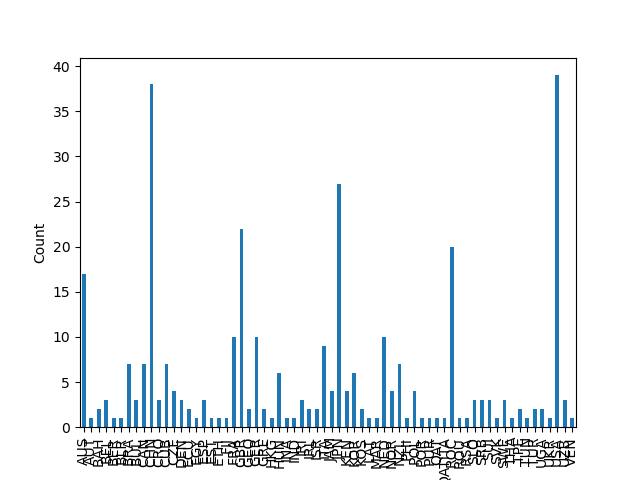

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Tokyo Gold')

In [62]:

tokyo_gold= tokyo_olympics.groupby(['Country Gold']).size()
ax= tokyo_gold.plot.bar(stacked=True)
ax.set_ylabel("Count")
ax.set_xlabel("Tokyo Gold")


<IPython.core.display.Javascript object>


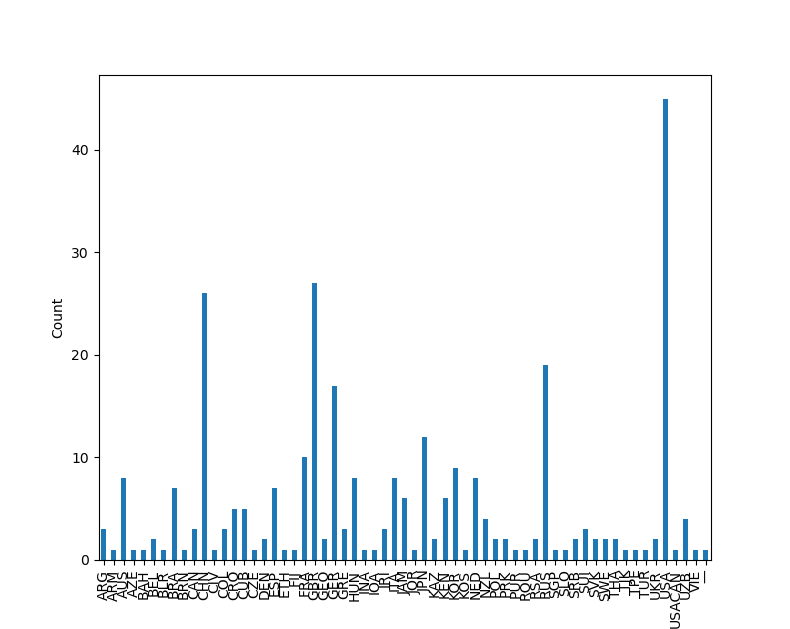

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Rio Gold')

In [65]:
rio_gold= rio_olympics.groupby(['Country Gold']).size()
ax= rio_gold.plot.bar(stacked=True)
ax.set_ylabel("Count")
ax.set_xlabel("Rio Gold")


<IPython.core.display.Javascript object>


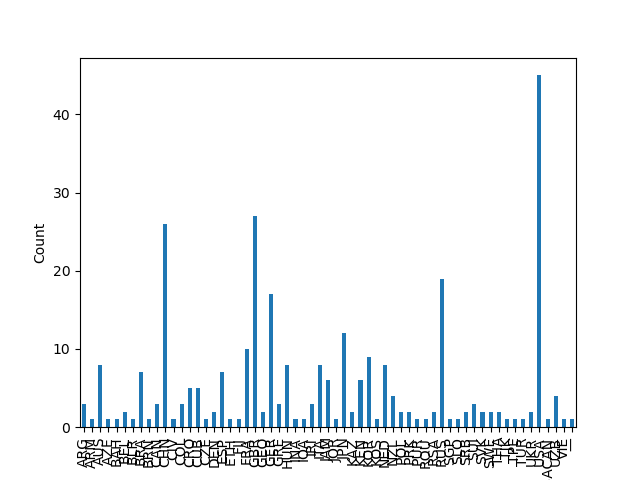

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Rio Gold')

In [67]:
tokyo_new_events20= rio_olympics.groupby(['Country Gold']).size()
ax= tokyo_new_events20.plot.bar(stacked=True)
ax.set_ylabel("Count")
ax.set_xlabel("Rio Gold")

In [71]:
la1984_olympics.to_csv("1984olympics.csv")